In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

'''''''''''''''''''''''''''''''''''''''''''''''''''''''''
< naver 뉴스 전문 가져오기 >_select 사용
- 네이버 뉴스만 가져와서 결과값 조금 작음 
- 결과 메모장 저장 -> 엑셀로 저장 
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''
RESULT_PATH = 'C:\\Users\\Kyungbok Lee\\Documents\\git\\python\\crawler&wordcloud\\'
now = datetime.now() #파일이름 현 시간으로 저장하기

def get_news(n_url):
    news_detail = []

    breq = requests.get(n_url)
    bsoup = BeautifulSoup(breq.content, 'html.parser')

    title = bsoup.select('h3#articleTitle')[0].text  #대괄호는  h3#articleTitle 인 것중 첫번째 그룹만 가져오겠다.
    news_detail.append(title)

    pdate = bsoup.select('.t11')[0].get_text()[:11]
    news_detail.append(pdate)

    _text = bsoup.select('#articleBodyContents')[0].get_text().replace('\n', " ")
    btext = _text.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
    news_detail.append(btext.strip())
  
    news_detail.append(n_url)
    
    pcompany = bsoup.select('#footer address')[0].a.get_text()
    news_detail.append(pcompany)

    return news_detail

def crawler(maxpage,query,s_date,e_date):

    s_from = s_date.replace(".","")
    e_to = e_date.replace(".","")
    page = 1
    maxpage_t =(int(maxpage)-1)*10+1   # 11= 2페이지 21=3페이지 31=4페이지  ...81=9페이지 , 91=10페이지, 101=11페이지
    f = open("C:\\Users\\Kyungbok Lee\\Documents\\git\\python\\crawler&wordcloud\\contents_text.txt", 'w', encoding='utf-8')
    
    while page < maxpage_t:
    
        print(page)
    
        url = "https://search.naver.com/search.naver?where=news&query=" + query + "&sort=0&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + "%2Ca%3A&start=" + str(page)
        
        req = requests.get(url)
        print(url)
        cont = req.content
        soup = BeautifulSoup(cont, 'html.parser')
            #print(soup)
    
        for urls in soup.select("._sp_each_url"):
            try :
                #print(urls["href"])
                if urls["href"].startswith("https://news.naver.com"):
                    #print(urls["href"])
                    news_detail = get_news(urls["href"])
                        # pdate, pcompany, title, btext
                    f.write("{}\t{}\t{}\t{}\t{}\n".format(news_detail[1], news_detail[4], news_detail[0], news_detail[2],news_detail[3]))  # new style
            except Exception as e:
                print(e)
                continue
        page += 10
    
    
    f.close()
    
def excel_make():
    data = pd.read_csv(RESULT_PATH+'contents_text.txt', sep='\t',header=None, error_bad_lines=False)
    data.columns = ['years','company','title','contents','link']
    print(data)
    
    xlsx_outputFileName = '%s-%s-%s  %s시 %s분 %s초 result.xlsx' % (now.year, now.month, now.day, now.hour, now.minute, now.second)
    #xlsx_name = 'result' + '.xlsx'
    data.to_excel(RESULT_PATH+xlsx_outputFileName, encoding='utf-8')

#crawler(100,"다이슨",2019.01.01,2019.04.28)
    
def main():
    maxpage = input("최대 출력할 페이지수 입력하시오: ") 
    query = input("검색어 입력: ")
    s_date = input("시작날짜 입력(2019.01.01):")  #2019.01.01
    e_date = input("끝날짜 입력(2019.04.28):")   #2019.04.28
    crawler(maxpage,query,s_date,e_date) #검색된 네이버뉴스의 기사내용을 크롤링합니다. 
    
    excel_make() #엑셀로 만들기 
main()

최대 출력할 페이지수 입력하시오: 100
검색어 입력: 다이슨
시작날짜 입력(2019.01.01):2019.01.01
끝날짜 입력(2019.04.28):2019.04.28
1
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=1
11
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=11
21
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=21
31
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=31
'NoneType' object has no attribute 'get_text'
41
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=41
51
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.2

521
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=521
531
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=531
541
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=541
551
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=551
561
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=561
571
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&ds=2019.01.01&de=2019.04.28&nso=so%3Ar%2Cp%3Afrom20190101to20190428%2Ca%3A&start=571
581
https://search.naver.com/search.naver?where=news&query=다이슨&sort=0&

b'Skipping line 407: expected 5 fields, saw 6\nSkipping line 427: expected 5 fields, saw 6\nSkipping line 463: expected 5 fields, saw 6\nSkipping line 468: expected 5 fields, saw 6\nSkipping line 535: expected 5 fields, saw 6\nSkipping line 560: expected 5 fields, saw 7\nSkipping line 577: expected 5 fields, saw 7\nSkipping line 578: expected 5 fields, saw 7\nSkipping line 584: expected 5 fields, saw 7\nSkipping line 592: expected 5 fields, saw 7\nSkipping line 602: expected 5 fields, saw 11\nSkipping line 607: expected 5 fields, saw 7\nSkipping line 628: expected 5 fields, saw 11\nSkipping line 637: expected 5 fields, saw 7\nSkipping line 648: expected 5 fields, saw 7\nSkipping line 651: expected 5 fields, saw 6\nSkipping line 652: expected 5 fields, saw 6\nSkipping line 656: expected 5 fields, saw 7\nSkipping line 663: expected 5 fields, saw 7\nSkipping line 666: expected 5 fields, saw 6\nSkipping line 671: expected 5 fields, saw 6\nSkipping line 678: expected 5 fields, saw 6\nSkippi

           years            company                                   title  \
0    2019.04.28.  eTimesinternet Co   [단독]LG전자, 다이슨 정조준한 '슈퍼 프리미엄 선풍기' 내놓는다   
1    2019.04.26.     financial news  무선청소기 법정공방.."다이슨도 허위광고" vs "LG제품 감정해야"   
2    2019.04.26.                뉴스1         '청소기전쟁' LG 반소청구…"다이슨 광고가 더 기만적"   
3    2019.04.24.               서울경제  티몬 리퍼데이 다이슨 청소기, 안마의자, 노트북 등 최대 90% 할인   
4    2019.04.24.            아시아경제신문       다이슨 청소기 리퍼 제품 30만원대…티몬 24일 '리퍼데이'   
..           ...                ...                                     ...   
955  2019.04.22.            아시아경제신문          백화점 명품도 핫딜…SSG닷컴, '해피바이러스' 키운다   
956  2019.03.13.             디지털타임스         ‘미세먼지 99.99% 제거’ 암웨이·게이트비전에 과징금   
957  2019.02.22.               조선비즈                [주말쇼핑가] "결혼 준비 백화점서 하세요"   
958  2019.02.18.         MoneyToday      '소니 PS4 Pro'를 반값에…SSG, '블랙쓱데이즈' 주목   
959  2019.04.24.                머니S             테일리스트, 독일·중국 호조로 1분기 매출액 급증   

                                              conte

In [5]:
contents = ""

In [6]:
df = pd.read_excel("2020-7-12  22시 59분 3초 result.xlsx")

In [18]:
df["title"]

0       [단독]LG전자, 다이슨 정조준한 '슈퍼 프리미엄 선풍기' 내놓는다
1      무선청소기 법정공방.."다이슨도 허위광고" vs "LG제품 감정해야"
2             '청소기전쟁' LG 반소청구…"다이슨 광고가 더 기만적"
3      티몬 리퍼데이 다이슨 청소기, 안마의자, 노트북 등 최대 90% 할인
4           다이슨 청소기 리퍼 제품 30만원대…티몬 24일 '리퍼데이'
                        ...                  
955            백화점 명품도 핫딜…SSG닷컴, '해피바이러스' 키운다
956           ‘미세먼지 99.99% 제거’ 암웨이·게이트비전에 과징금
957                  [주말쇼핑가] "결혼 준비 백화점서 하세요"
958        '소니 PS4 Pro'를 반값에…SSG, '블랙쓱데이즈' 주목
959               테일리스트, 독일·중국 호조로 1분기 매출액 급증
Name: title, Length: 960, dtype: object

In [9]:
for i in df["contents"]:
    contents += i

In [10]:
contents

'이미지컷 - 게티이미지뱅크LG전자가 수십만원짜리 \'슈퍼 프리미엄 선풍기\'를 내놓는다. 다이슨의 30만~100만원짜리 \'날개 없는 선풍기\'를 정조준했다. LG전자의 자사 에어컨, 공기청정기와 함께 시너지를 낼 \'틈새 제품\'으로 시장을 파고들겠다는 계획이다.28일 업계에 따르면 LG전자 홈앤어플라이언스(H&A) 사업본부는 선풍기 기본 기능인 냉풍·송풍뿐만 아니라 공기 정화, 공기 청정, 서큘레이팅 등을 복합적으로 구현해 내는 프리미엄 선풍기 제품 개발을 마쳤다. 출시 전 안전성 테스트와 가격 정책 협의 등을 이어 가고 있다.시중에 판매되는 3만원짜리 저가형 선풍기와는 완전히 선을 그었다. LG전자 가전 사업의 핵심 경쟁력인 모터 기술을 응용한 제품이다. 디자인에도 차별성을 강조할 것으로 보인다.업계는 사계절 가전으로 자리 잡기 위해 온풍 기능 추가 가능성도 있는 것으로 보고 있다. 차별화를 강조하기 위해 제품 이름에 \'선풍기\'라는 말은 사용하지 않을 것으로 알려졌다.참고 사진: 다이슨 퓨어 핫앤쿨 공기청정기선풍기 시장은 중소기업의 주 활동 영역이다. 바람 기능만 있는 일반 선풍기는 가격도 싸고 기술 진입 장벽도 낮다. 중국 저가형 제품도 난립하는 시장이다.그러나 공기 청정과 공기의 직진 성격을 높이는 서큘레이팅과 같은 프리미엄 기능이 추가되면 이야기가 달라진다. 경쟁사인 다이슨은 종합 기능을 갖춘 날개 없는 선풍기로 무선 청소기 못지않은 인기를 끌고 있다. 이 제품은 소형 에어컨 가격을 넘보는 고가 제품이다. 그럼에도 입소문이 퍼지면서 꾸준히 판매되고 있다. LG전자는 이 시장을 넘보려 한다. 수십만원에 이르는 고가 제품인 만큼 수익성도 좋다.LG전자는 자사 에어컨과 공기청정기 사이에서 틈새시장을 개척할 신제품을 마케팅한다는 방침을 세웠다. 초고가 선풍기인 만큼 고객으로 하여금 지갑을 열도록 설득할 충분한 광고와 마케팅이 필수다. 자사 에어컨, 공기청정기, 제습기 등 환경 가전제품 간 시너지를 내는 게 목표다.LG전자 로고출시 시기는 아직 정해지지

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
wordcloud = WordCloud(font_path='font/NanumGothic.ttf', background_color='white',
                      width = 1000,
                     height = 1000,
                     max_words = 100,
                     max_font_size = 300).generate(contents)


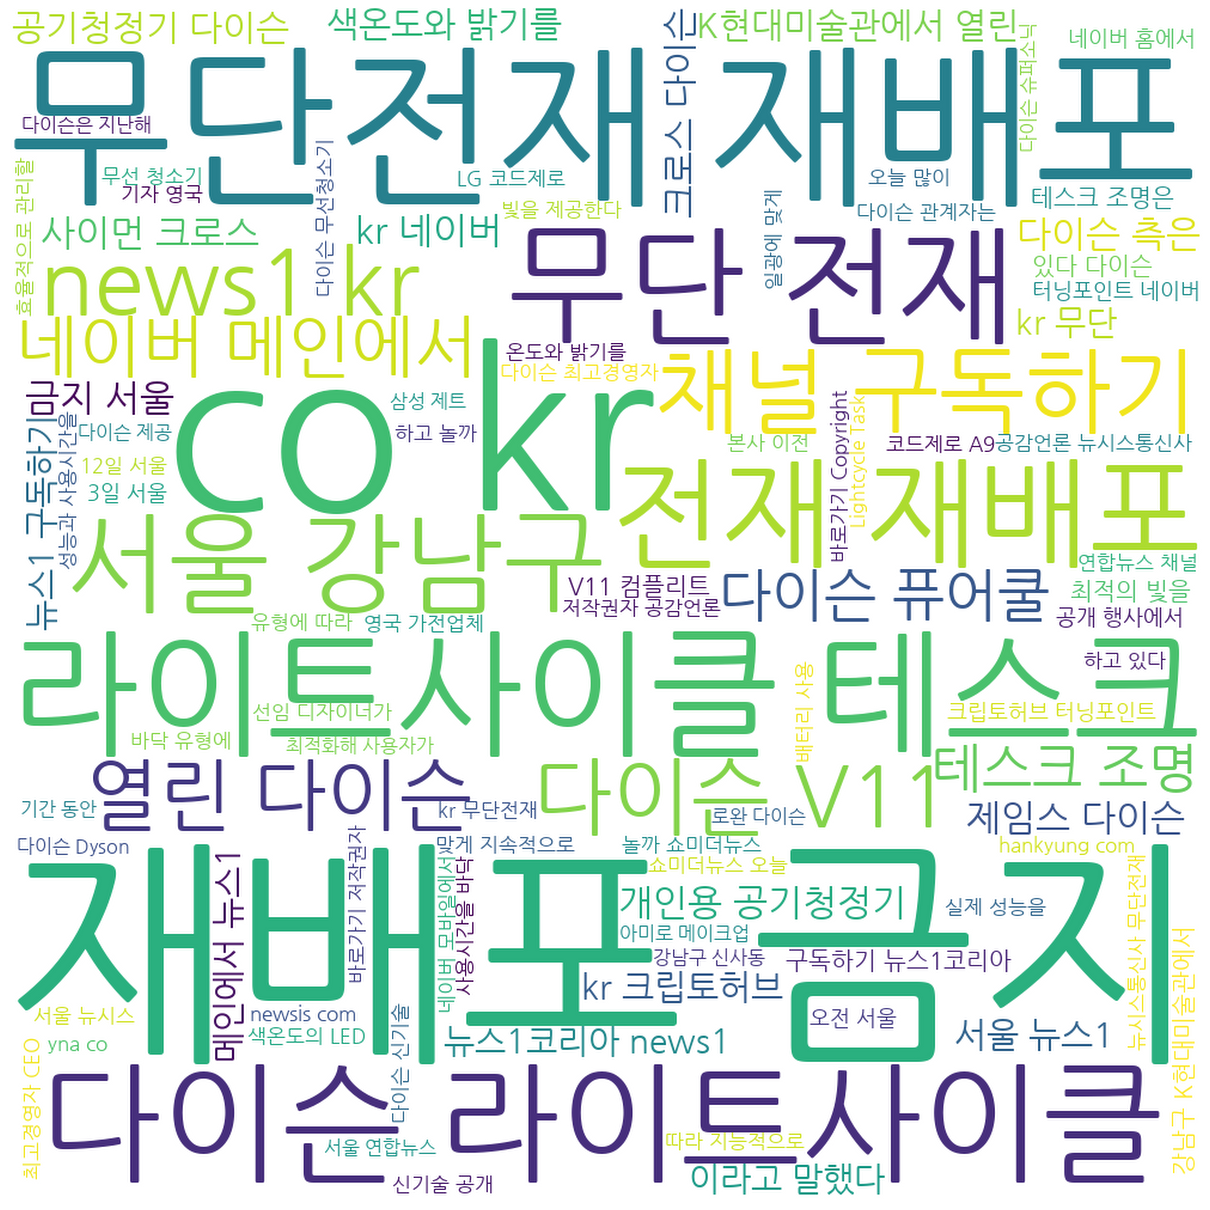

In [27]:
plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 



In [20]:
titles = ""

In [21]:
for i in df["title"]:
    titles += i

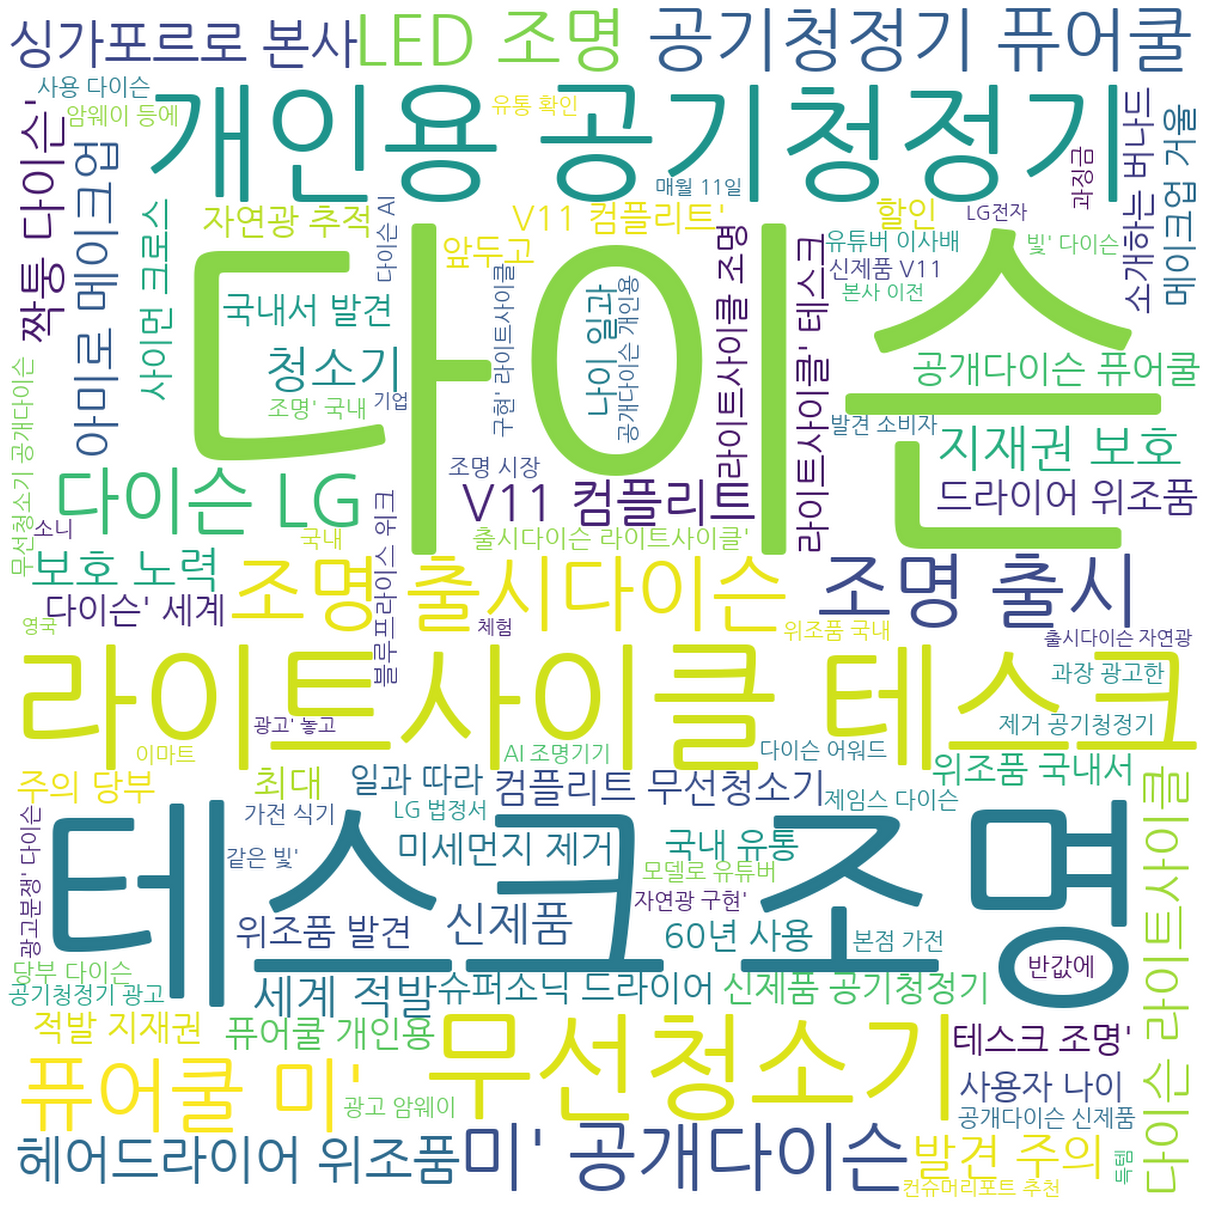

In [25]:

 
wordcloud = WordCloud(font_path='font/NanumGothic.ttf', background_color='white',
                     width = 1000,
                     height = 1000,
                     max_words = 100,
                     max_font_size = 300).generate(titles)
plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 